In [1]:
# Importar la librería
import yfinance as yf

# Crear objeto para Tesla
tesla = yf.Ticker("TSLA")

# Descargar los datos históricos
tesla_data = tesla.history(period="max")

# Resetear el índice para que la fecha sea una columna
tesla_data.reset_index(inplace=True)

# Ver las primeras cinco filas
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [3]:
!pip install requests
!pip install beautifulsoup4
!pip install lxml

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Descargar el HTML de la página
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Analizar el HTML
soup = BeautifulSoup(html_data, "html.parser")

# Buscar todas las tablas
tables = soup.find_all("table")

# Buscar la tabla que contiene "Tesla Quarterly Revenue"
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue_table = table
        break

# Extraer los datos a un dataframe
tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

# Eliminar filas con valores nulos o vacíos
tesla_revenue.dropna(inplace=True)

# Mostrar las últimas cinco filas
tesla_revenue.tail()

NameError: name 'tesla_revenue_table' is not defined

In [7]:
print(len(tables))  # Cuántas tablas hay
for i, table in enumerate(tables):
    print(f"\n--- Tabla {i} ---\n")
    print(table.text[:500])  # Muestra los primeros 500 caracteres de cada tabla

0


In [9]:
print(len(tables))  # Cuántas tablas hay
for i, table in enumerate(tables):
    print(f"\n--- Tabla {i} ---\n")
    print(table.text[:500])  # Muestra los primeros 500 caracteres de cada tabla

0


In [11]:
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tables = pd.read_html(url)  # Esto extrae TODAS las tablas de la página

print(f"Número de tablas encontradas: {len(tables)}")

# Visualiza las primeras filas de cada tabla para encontrar la correcta
for i, table in enumerate(tables):
    print(f"\n--- Tabla {i} ---\n")
    print(table.head())

HTTPError: HTTP Error 403: Forbidden

In [13]:
import pandas as pd
import requests

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url).text

# Lee las tablas desde el HTML descargado
tables = pd.read_html(html)

# Muestra cuántas tablas hay y las primeras filas para identificar la correcta
print(f"Número de tablas encontradas: {len(tables)}")

for i, table in enumerate(tables):
    print(f"\n--- Tabla {i} ---\n")
    print(table.head())

C:\Users\Alejandra\AppData\Local\Temp\ipykernel_12708\234983901.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


ValueError: No tables found

In [15]:
import pandas as pd
import requests
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url).text

# Usa StringIO para simular un archivo HTML
tables = pd.read_html(StringIO(html))

print(f"Número de tablas encontradas: {len(tables)}")

# Muestra contenido de cada tabla para identificar la correcta
for i, table in enumerate(tables):
    print(f"\n--- Tabla {i} ---\n")
    print(table.head())

ValueError: No tables found

In [17]:
import pandas as pd
import requests
from io import StringIO

# Descargar HTML
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url).text

# Convertir el HTML en un archivo tipo StringIO
html_file = StringIO(html)

# Leer las tablas con parser 'lxml'
tables = pd.read_html(html_file, flavor='lxml')

# Confirmar número de tablas encontradas
print(f"Número de tablas encontradas: {len(tables)}")

# Mostrar las primeras filas de cada tabla para encontrar la correcta
for i, table in enumerate(tables):
    print(f"\n--- Tabla {i} ---\n")
    print(table.head())

ValueError: No tables found matching regex '.+'

In [19]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tables = pd.read_html(url)
print(f"Número de tablas encontradas: {len(tables)}")

HTTPError: HTTP Error 403: Forbidden

In [21]:
import pandas as pd

url = "https://www.statista.com/statistics/272120/revenue-of-tesla/"
tables = pd.read_html(url)

print(f"Número de tablas encontradas: {len(tables)}")

Número de tablas encontradas: 1


In [23]:
# Inspeccionar las primeras filas de cada tabla
for i, table in enumerate(tables):
    print(f"\nTabla {i} ---\n")
    print(table.head())


Tabla 0 ---

  Fiscal year Revenue in million U.S. dollars
0           -                               -
1           -                               -
2           -                               -
3           -                               -
4           -                               -


In [25]:
tesla_revenue = tables[0]  # O reemplaza 0 por el índice correcto
tesla_revenue.tail()

,Fiscal year,Revenue in million U.S. dollars
12,-,-
13,-,-
14,-,-
15,-,-
16,-,-


In [27]:
import yfinance as yf

# Crear objeto para GameStop
gme = yf.Ticker("GME")

# Descargar datos históricos
gme_data = gme.history(period="max")

# Resetear el índice para que la fecha esté como columna
gme_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [29]:
import yfinance as yf

In [31]:
gme = yf.Ticker("GME")

In [33]:
gme_data = gme.history(period="max")

In [35]:
gme_data.reset_index(inplace=True)

In [37]:
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [39]:
import pandas as pd

In [41]:
url = "https://www.statista.com/statistics/311539/revenue-of-gamestop/"

In [43]:
tables = pd.read_html(url)

HTTPError: HTTP Error 404: Not Found

In [45]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Descarga el HTML de la página
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

# Analiza el HTML
soup = BeautifulSoup(html_data, "html.parser")

# Encuentra todas las tablas
tables = soup.find_all("table")

# Inspecciona cada tabla para encontrar la correcta
for i, table in enumerate(tables):
    print(f"\nTabla {i}\n")
    print(table.text[:500])  # Opcional: ver el contenido de cada tabla

# Suponiendo que la tabla correcta es la primera (ajusta si no lo es)
gme_revenue = pd.read_html(str(tables[0]))[0]  # <-- cambia el índice si hace falta

# Limpia filas vacías
gme_revenue.dropna(inplace=True)

# Muestra las últimas cinco filas
gme_revenue.tail()

IndexError: list index out of range

In [47]:
print(f"Número de tablas encontradas: {len(tables)}")

Número de tablas encontradas: 0


In [49]:
print(html_data[:1000])  # Muestra los primeros 1000 caracteres del HTML

<html>
<head>

</head>
<body>
<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">

<h1>We do not allow automated access to our servers.</h1>
<h2><p>Automated access to our data is prohibited by our data provider.</p>  
<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>

<ul>
  <li>Go to <a href='https://whatismyipaddress.com/' target='_blank' rel='noopener noreferrer'>whatismyipaddress</a> and obtain your IPv4 address</li>
  <li>Email us your IPv4 address at <a href="/cdn-cgi/l/email-protection" class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c">[email&#160;protected]</a></li>
  <li>We will add you to our whitelist within 24 hours</li>
</ul>
</h2>
</div>
<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"error"in console?console.error(e):console.lo


In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Usar cabeceras para simular un navegador real
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
html_data = requests.get(url, headers=headers).text

# Analizar HTML
soup = BeautifulSoup(html_data, "html.parser")

# Encontrar todas las tablas
tables = soup.find_all("table")

# Mostrar número de tablas
print(f"Número de tablas encontradas: {len(tables)}")

# Opcional: inspeccionar las primeras tablas
for i, table in enumerate(tables):
    print(f"\nTabla {i} ---\n")
    print(table.text[:500])  # primeros 500 caracteres

Número de tablas encontradas: 6

Tabla 0 ---




GameStop Annual Revenue(Millions of US $)




2025
$3,823


2024
$5,273


2023
$5,927


2022
$6,011


2021
$5,090


2020
$6,466


2019
$8,285


2018
$8,547


2017
$7,965


2016
$9,364


2015
$9,296


2014
$9,040


2013
$8,887


2012
$9,551


2011
$9,474


2010
$9,078


2009
$8,806




Tabla 1 ---




GameStop Quarterly Revenue(Millions of US $)




2025-01-31
$1,283


2024-10-31
$860


2024-07-31
$798


2024-04-30
$882


2024-01-31
$1,794


2023-10-31
$1,078


2023-07-31
$1,164


2023-04-30
$1,237


2023-01-31
$2,226


2022-10-31
$1,186


2022-07-31
$1,136


2022-04-30
$1,378


2022-01-31
$2,254


2021-10-31
$1,297


2021-07-31
$1,183


2021-04-30
$1,277


2021-01-31
$2,122


2020-10-31
$1,005


2020-07-31
$942


2020-04-30
$1,021


2020-01-31
$2,194


2019-10-31
$1,439


2019-07-31
$1,28

Tabla 2 ---




Sector
Industry
Market Cap
Revenue




Consumer Discretionary
Gaming
$11.170B
$5.273B



GameStop Corp. offers the best selection of n

In [53]:
# Extraer la tabla como DataFrame
gme_revenue = pd.read_html(str(tables[0]))[0]

# Limpiar filas vacías o nulas si es necesario
gme_revenue.dropna(inplace=True)

# Mostrar las últimas cinco filas
gme_revenue.tail()

C:\Users\Alejandra\AppData\Local\Temp\ipykernel_12708\861050176.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables[0]))[0]


,GameStop Annual Revenue (Millions of US $),GameStop Annual Revenue (Millions of US $).1
12,2013,"$8,887"
13,2012,"$9,551"
14,2011,"$9,474"
15,2010,"$9,078"
16,2009,"$8,806"


In [56]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

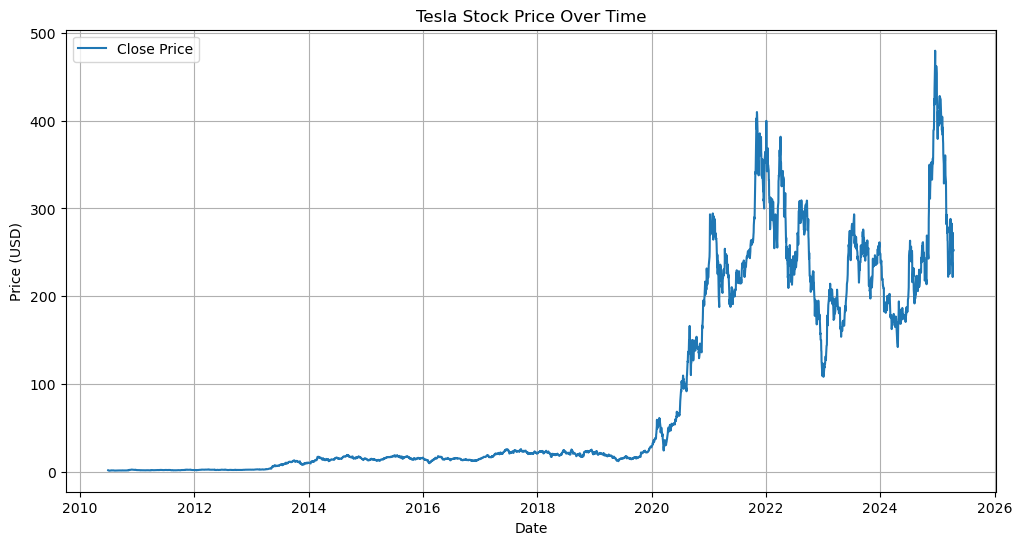

In [58]:
make_graph(tesla_data, "Tesla Stock Price Over Time")

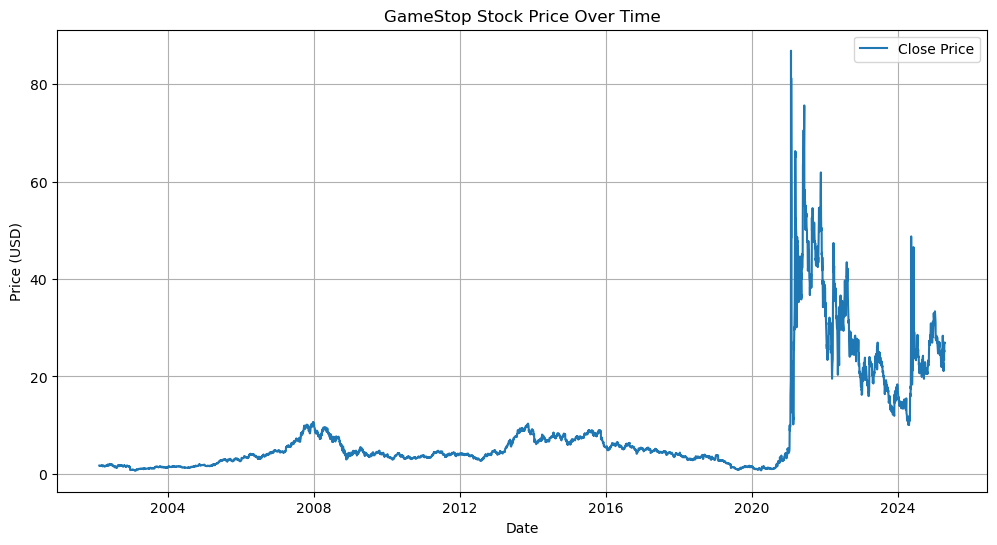

In [60]:
import matplotlib.pyplot as plt

# Definir función para graficar
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

gme_data.reset_index(inplace=True)

# Llamar la función con los datos de GameStop
make_graph(gme_data, "GameStop Stock Price Over Time")